In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

%matplotlib inline

## 0. Описать задачу словами

Используя свойства астероидов, можно определить, опасны они или нет.

## 1. Прочитать данные

In [2]:
file = "Asteroid_Updated.csv"
data_raw = pd.read_csv(file)

C:\Users\user\AppData\Local\Temp\ipykernel_17620\3588922651.py:2: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(file)


Набор данных [Asteroid Features For Hazardous Prediction / NASA](https://www.kaggle.com/datasets/brsdincer/asteroid-classification-for-hazardous-prediction#) представляет информацию о более чем 800 000 астероидах и включает в себя 31 признак, представляющие данные об астероидах и их опасность.

In [3]:
data_raw.shape

(839714, 31)

Первые 5 строк, транспонируем для удобства:

In [4]:
data_raw.head().T

,0,1,2,3,4
name,Ceres,Pallas,Juno,Vesta,Astraea
a,2.769165,2.772466,2.66915,2.361418,2.574249
e,0.076009,0.230337,0.256942,0.088721,0.191095
i,10.594067,34.836234,12.988919,7.141771,5.366988
om,80.305532,173.080063,169.85276,103.810804,141.576605
w,73.597694,310.048857,248.138626,150.728541,358.687607
q,2.558684,2.133865,1.983332,2.151909,2.082324
ad,2.979647,3.411067,3.354967,2.570926,3.066174
per_y,4.608202,4.616444,4.360814,3.628837,4.130323
data_arc,8822.0,72318.0,72684.0,24288.0,63507.0


Последние 5 строк, транспонируем для удобства:

In [5]:
data_raw.tail().T

,839709,839710,839711,839712,839713
name,NaN,NaN,NaN,NaN,NaN
a,2.812945,2.645238,2.373137,2.260404,2.546442
e,0.664688,0.259376,0.202053,0.258348,0.287672
i,4.6957,12.574937,0.732484,9.661947,5.356238
om,183.310012,1.62002,176.499082,204.512448,70.709555
w,234.618352,339.568072,198.026527,148.496988,273.483265
q,0.943214,1.959126,1.893638,1.676433,1.813901
ad,4.682676,3.33135,2.852636,2.844376,3.278983
per_y,4.717914,4.302346,3.655884,3.398501,4.06358
data_arc,17298.0,16.0,5.0,10.0,11.0


Названия столбцов:

In [6]:
data_raw.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

####  Числовые признаки
- `a` - большая полуось (астрономицеская единица)
- `e` - эксцентриситет
- `i` - наклон относительно плоскости эклиптики x-y (градус)
- `om` - долгота восходящего узла
- `w` - аргумент перигелия
- `q` - расстояние до перигелия (астрономицеская единица)
- `ad` - расстояние до афелия (астрономицеская единица)
- `per_y` - орбитальный период (год)
- `data_arc` - диапазон дуги передачи данных (не важно для расчета)
- `n_obs_used` - число пунктов наблюдения (не важно для расчета)
- `H` - параметр абсолютной величины
- `diameter` - диаметр
- `albedo` - значение альбедо
- `rot_per` - период вращения
- `GM` - стандартный гравитационный параметр
- `BV` - гиперболическая траектория
- `UB` - объемная скорость
- `IR` - инфракрасное излучение
- `G` - параметр наклона
- `moid` - минимальное расстояние пересечения земной орбиты (астрономицеская единица)
- `n` - среднее движение (градус/день)
- `per` - орбитальный период (день)
- `ma` - средняя аномалия (градус)

####  Номинальные признаки
- `name` - название астероида
- `neo` - околоземный объект (N или Y)
- `pha` - физически опасный астероид (N или Y)
- `condition_code` - степень уверенности в орбите астероида
- `extent` - размеры
- `spec_B` - спецификация типа класса
- `spec_T` - общий типа класса
- `class` - класс астероида по местоположению

Требуется предсказать номинальный признак `pha` по остальным признакам.

Типы признаков:

In [7]:
data_raw.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

Приведем столбцы с объектными типами к интерпретируемым.

In [8]:
data_raw['name'] = data_raw['name'].astype('string')
data_raw['condition_code'] = data_raw['condition_code'].astype('category')
data_raw['neo'] = data_raw['neo'].astype('category')
data_raw['pha'] = data_raw['pha'].astype('category')
data_raw['diameter'] = data_raw['diameter'].astype('float64')
data_raw['extent'] = data_raw['extent'].astype('string')
data_raw['spec_B'] = data_raw['spec_B'].astype('category')
data_raw['spec_T'] = data_raw['spec_T'].astype('category')
data_raw['class'] = data_raw['class'].astype('category')

In [9]:
data_raw.dtypes

name                string
a                  float64
e                  float64
i                  float64
om                 float64
w                  float64
q                  float64
ad                 float64
per_y              float64
data_arc           float64
condition_code    category
n_obs_used           int64
H                  float64
neo               category
pha               category
diameter           float64
extent              string
albedo             float64
rot_per            float64
GM                 float64
BV                 float64
UB                 float64
IR                 float64
spec_B            category
spec_T            category
G                  float64
moid               float64
class             category
n                  float64
per                float64
ma                 float64
dtype: object

## 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

Описание количественных признаков.

In [10]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
a,839712.0,2.757514,114.384959,-1.042792e+05,2.385258,2.644219,2.996048,3.043149e+03
e,839714.0,0.155636,0.093897,0.000000e+00,0.091454,0.143655,0.199400,1.201134e+00
i,839714.0,8.949826,6.666087,7.545953e-03,4.069077,7.257101,12.255653,1.751887e+02
om,839714.0,168.499466,103.096307,3.882104e-04,80.211400,160.294860,252.201519,3.599998e+02
w,839714.0,181.075796,104.023854,1.665763e-03,91.041603,181.669478,271.521717,3.599998e+02
q,839714.0,2.404728,2.233172,7.051073e-02,1.971941,2.225510,2.578162,8.042417e+01
ad,839708.0,3.385710,12.748733,7.736836e-01,2.775350,3.037761,3.357967,6.081842e+03
per_y,839713.0,6.859734,252.264249,0.000000e+00,3.683928,4.299859,5.185985,1.678777e+05
data_arc,824240.0,5688.422331,4208.177231,0.000000e+00,3608.000000,5806.000000,7270.000000,7.268400e+04
n_obs_used,839714.0,259.191837,371.759667,2.000000e+00,50.000000,118.000000,296.000000,9.325000e+03


Описание номинальных признаков.

In [11]:
data_raw.describe(include=['category'])

,condition_code,neo,pha,spec_B,spec_T,class
count,838847,839708,823272,1666,980,839714
unique,22,2,2,34,131,14
top,0,N,N,S,S,MBA
freq,540392,818308,821257,445,338,747420


Описание номинальных признаков строкового типа.

In [12]:
data_raw.describe(include=['string'])

,name,extent
count,21967,18
unique,21967,18
top,Ceres,964.4 x 964.2 x 891.8
freq,1,1


Отрисовка всех точек требует много времени. Поэтому изобразим только $500$ случайных точек на рекомендованном(автором с kaggle) подмножестве столбцов:

In [13]:
n_samples = 500
np.random.seed(n_samples)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=n_samples, replace=False)

collumn_subset = ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'H', 'neo', 'pha', 'moid', 'n', 'per', 'ma']

Построим все возможные диаграммы рассеивания для каждой пары переменных:

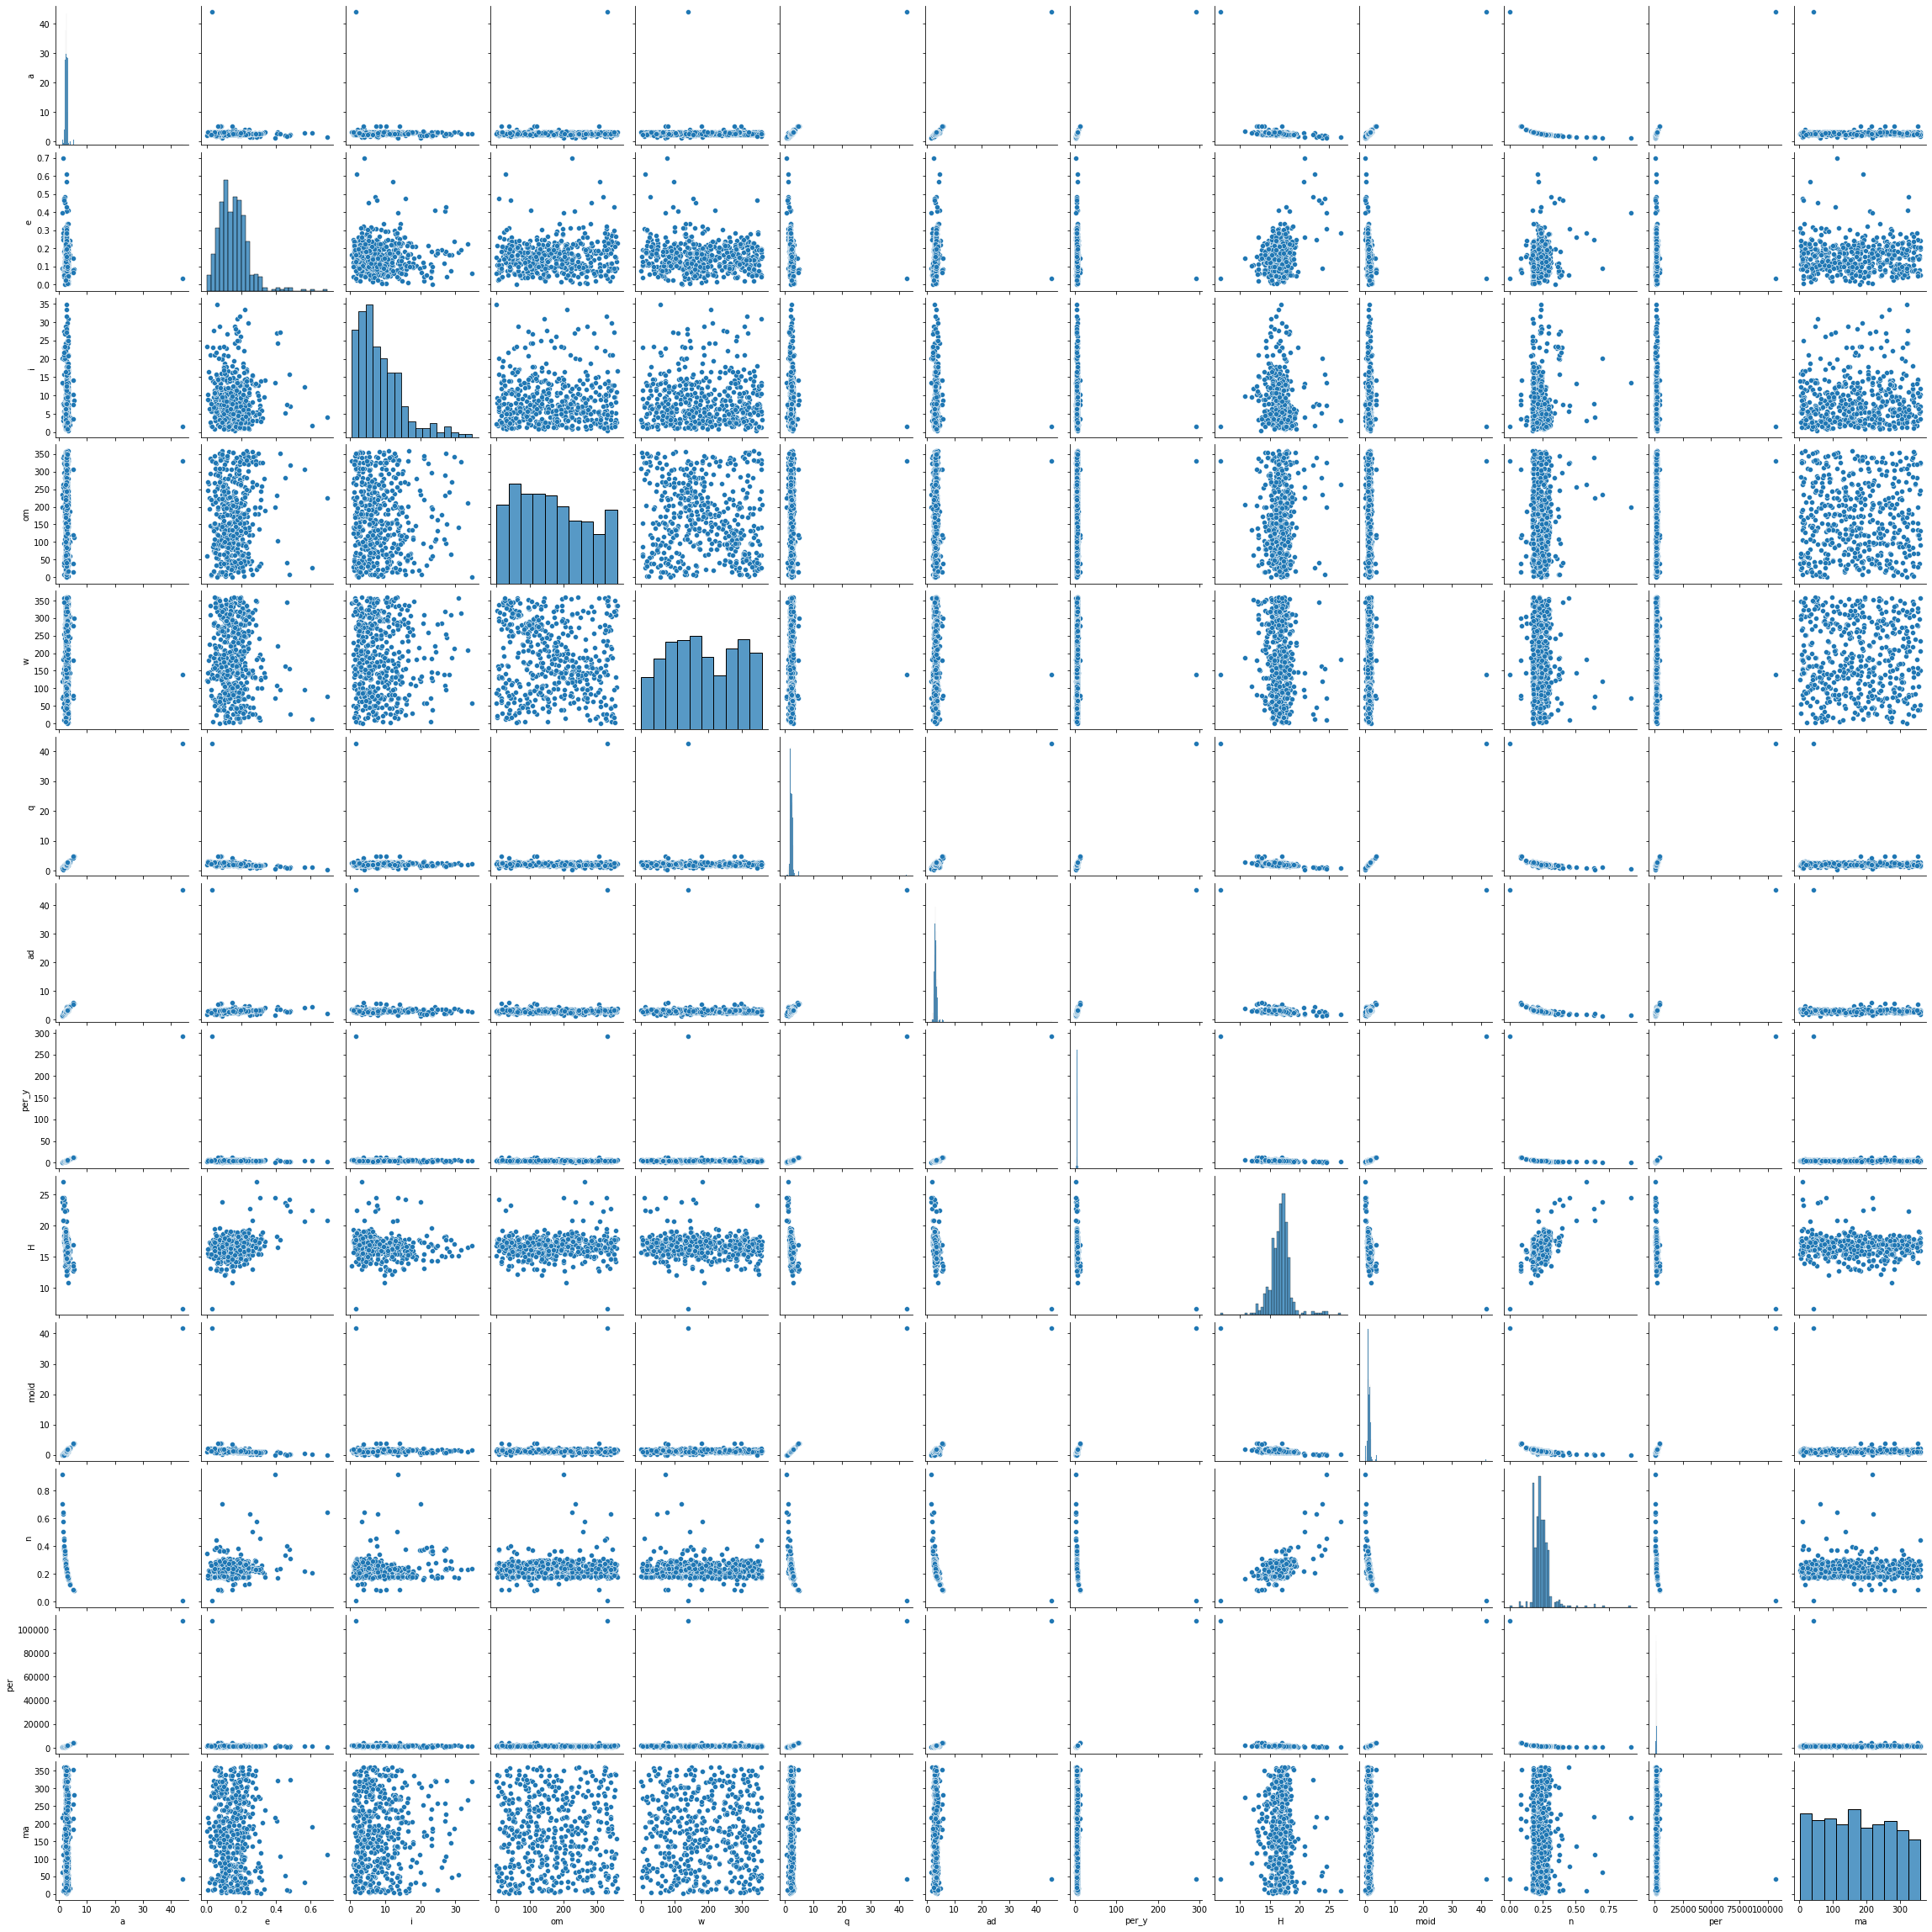

In [14]:
sns.pairplot(data_raw[collumn_subset].iloc[random_subset], diag_kind='hist')
pass


Матрица корреляции:

In [15]:
corr_mat = data_raw.corr()
corr_mat

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
a,1.000000,-0.007111,-0.018964,0.000160,-0.001278,0.025030,0.987717,0.053017,0.000101,-0.000411,...,0.000442,0.194758,-0.279940,-0.342680,NaN,0.051353,0.024907,-0.005142,0.891161,0.001651
e,-0.007111,1.000000,0.132896,0.005214,0.008001,-0.115332,0.086937,0.043692,-0.149718,-0.079551,...,-0.008732,-0.322786,0.003246,0.060738,NaN,-0.306462,-0.105112,0.201231,0.043704,-0.015510
i,-0.018964,0.132896,1.000000,-0.015764,-0.000678,0.032018,0.072187,0.040403,-0.140760,-0.071664,...,0.027796,0.192959,-0.004760,-0.066472,NaN,-0.192274,0.040909,0.000048,0.040446,0.006970
om,0.000160,0.005214,-0.015764,1.000000,-0.132326,-0.010887,-0.001964,-0.000762,0.001754,-0.005426,...,0.010091,-0.278408,0.025573,-0.014701,NaN,0.131323,-0.011062,0.008964,-0.000762,0.000622
w,-0.001278,0.008001,-0.000678,-0.132326,1.000000,-0.003389,-0.000311,-0.000634,-0.005392,0.003728,...,-0.007002,-0.313441,-0.031047,-0.026706,NaN,0.003994,-0.003382,0.003666,-0.000634,-0.007678
q,0.025030,-0.115332,0.032018,-0.010887,-0.003389,1.000000,0.307086,0.109930,-0.028366,-0.029189,...,0.000486,0.233195,-0.239324,-0.319265,NaN,0.184511,0.999742,-0.327816,0.109932,-0.004584
ad,0.987717,0.086937,0.072187,-0.001964,-0.000311,0.307086,1.000000,0.931519,-0.021468,-0.014524,...,0.000389,0.147153,-0.270004,-0.310324,NaN,-0.092841,0.307560,-0.098210,0.931519,-0.006203
per_y,0.053017,0.043692,0.040403,-0.000762,-0.000634,0.109930,0.931519,1.000000,-0.008663,-0.005066,...,-0.001040,0.174088,-0.231056,-0.295005,NaN,0.041989,0.110164,-0.031487,1.000000,-0.002946
data_arc,0.000101,-0.149718,-0.140760,0.001754,-0.005392,-0.028366,-0.021468,-0.008663,1.000000,0.731498,...,0.027712,-0.226509,-0.030433,0.062306,NaN,0.254649,-0.031287,-0.075088,-0.008664,-0.002594
n_obs_used,-0.000411,-0.079551,-0.071664,-0.005426,0.003728,-0.029189,-0.014524,-0.005066,0.731498,1.000000,...,0.037892,-0.026056,-0.035003,0.009712,NaN,0.279072,-0.031043,-0.009492,-0.005066,-0.010921


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

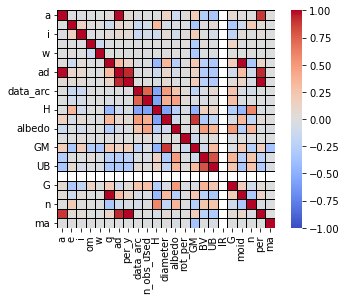

In [16]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin = -1, vmax = 1, center=0, linewidths=1, linecolor="black")
pass

Выведем коэффициенты корреляции, большие $0.4$ :


In [17]:
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)

per_y       per           1.000000
q           moid          0.999742
a           ad            0.987717
ad          per_y         0.931519
            per           0.931519
a           per           0.891161
diameter    GM            0.888500
BV          UB            0.800437
data_arc    n_obs_used    0.731498
H           n             0.588197
albedo      G             0.495896
data_arc    diameter      0.491603
albedo      BV            0.491355
n_obs_used  albedo        0.450589
dtype: float64

Выведем коэффициенты корреляции, меньшие $-0.4$ :

In [18]:
corr_mat.where(np.triu(corr_mat < -0.4, k=1)).stack().sort_values(ascending=False)

H           moid       -0.432188
q           H          -0.436451
H           GM         -0.474470
data_arc    H          -0.551003
H           diameter   -0.568655
n_obs_used  H          -0.572294
dtype: float64

Несбалансированность классов:

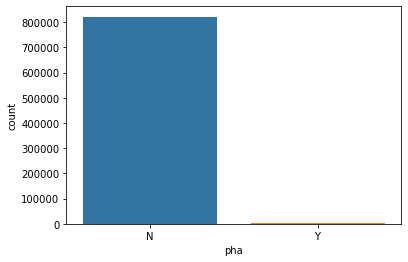

In [19]:
sns.countplot(x='pha', data=data_raw)
pass

## 11. По желанию: исключить коррелированные переменные (объяснить зачем)

Исключим сильно коррелирующие переменные, чтобы упростить задачу обучения модели. При этом не сильно повлияв на точность.

In [20]:
corr_mat.where(np.triu(corr_mat > 0.98, k=1)).stack().sort_values(ascending=False)

per_y  per     1.000000
q      moid    0.999742
a      ad      0.987717
dtype: float64

In [21]:
data_raw.drop(['per', 'moid', 'a'], axis=1, inplace=True)

##  3. Обработать пропущенные значения (или убедиться, что их нет)

Пропущенные значения в таблице представлены значениями `np.nan`.
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [22]:
data_na_statistic = (data_raw.isna().sum() / data_raw.shape[0] * 100).sort_values(ascending=False)
data_na_statistic

IR                99.999881
GM                99.998333
extent            99.997856
G                 99.985829
UB                99.883413
spec_T            99.883294
BV                99.878411
spec_B            99.801599
rot_per           97.761619
name              97.383990
albedo            83.755302
diameter          83.609181
pha                1.958048
data_arc           1.842770
H                  0.320228
condition_code     0.103249
ma                 0.000953
neo                0.000715
ad                 0.000715
n                  0.000238
per_y              0.000119
e                  0.000000
n_obs_used         0.000000
q                  0.000000
w                  0.000000
om                 0.000000
i                  0.000000
class              0.000000
dtype: float64

Удалим строки в которых пропущено значение искомого признака `pha`

In [23]:
data_raw.dropna(subset=['pha'], inplace=True)

Удалим столбцы, в которых пропущено более $70\%$ записей

In [24]:
data_raw.drop(data_na_statistic[data_na_statistic > 70].index, axis=1, inplace=True)

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [25]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17620\3749499989.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


In [26]:
(data_raw.isna().sum() / data_raw.shape[0] * 100).sort_values(ascending=False)

condition_code    0.001579
neo               0.000729
e                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000000
per_y             0.000000
data_arc          0.000000
n_obs_used        0.000000
H                 0.000000
pha               0.000000
class             0.000000
n                 0.000000
ma                0.000000
dtype: float64

Пропущенные значения в столбцах, соответствующих номинальным признакам, заполним модой:


In [27]:
data_raw['condition_code'].fillna(data_raw['condition_code'].mode().iloc[0], inplace=True)
data_raw['neo'].fillna(data_raw['neo'].mode().iloc[0], inplace=True)

In [28]:
data_raw.isna().sum().sort_values(ascending=False)

e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
class             0
n                 0
ma                0
dtype: int64

## 4. Обработать категориальные признаки

Удалим номинальный признак `class`, т.к. он по смыслу является категоризацией числогого признака `moid`.

In [29]:
data_raw.drop(['class'], axis=1, inplace=True)

Удалим номинальный признак `condition_code`, т.к. он по смыслу является оценкой степени уверенности в прогнозах орбиты, а опасность астероида оценивается по его текущей орбите.

In [30]:
data_raw.drop(['condition_code'], axis=1, inplace=True)

Закодируем бинарные номинальные признаки с помощью числовых.

In [31]:
data_raw['neo'] = pd.factorize(data_raw['neo'])[0]
data_raw['pha'] = pd.factorize(data_raw['pha'])[0]

In [32]:
data_raw.dtypes

e             float64
i             float64
om            float64
w             float64
q             float64
ad            float64
per_y         float64
data_arc      float64
n_obs_used      int64
H             float64
neo             int64
pha             int64
n             float64
ma            float64
dtype: object

Остались только количественные признаки.

## 5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Произведем стандартизацию всех признаков:

In [33]:
data = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
data

,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,n,ma
0,-0.847631,0.246403,-0.855389,-1.032806,0.067673,-0.031955,-0.008999,0.743065,1.973630,-7.341407,-0.163359,-0.049533,-0.290922,-0.972438
1,0.790337,3.874633,0.044191,1.239780,-0.120865,0.001584,-0.008967,15.845674,21.982734,-6.909625,-0.163359,-0.049533,-0.295607,-1.138444
2,1.072716,0.604831,0.012898,0.644747,-0.187672,-0.002777,-0.009971,15.932728,18.279126,-6.253753,-0.163359,-0.049533,-0.142045,-1.371153
3,-0.712707,-0.270289,-0.627472,-0.291484,-0.112857,-0.063729,-0.012844,4.421674,24.213985,-7.417926,-0.163359,-0.049533,0.417340,-0.798759
4,0.373836,-0.535914,-0.261279,1.707258,-0.143739,-0.025228,-0.010875,13.749966,7.088136,-5.422982,-0.163359,-0.049533,0.012713,0.953117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,5.400354,-0.636383,0.143385,0.514800,-0.649284,0.100441,-0.008569,2.759093,-0.388556,1.982904,6.121471,20.188393,-0.351948,-0.225359
839710,1.098549,0.542872,-1.618357,1.523496,-0.198415,-0.004613,-0.010200,-1.351454,-0.663788,0.401706,-0.163359,-0.049533,-0.104358,-1.573659
839711,0.490143,-1.229542,0.077344,0.163108,-0.227479,-0.041829,-0.012738,-1.354071,-0.687838,0.709966,-0.163359,-0.049533,0.392685,1.638680
839712,1.087638,0.106896,0.348973,-0.312932,-0.323876,-0.042471,-0.013748,-1.352882,-0.669133,0.703954,-0.163359,-0.049533,0.643208,-1.555306


Как результат mean близко к 0, а std равно 1.

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
e,823272.0,-4.821333e-15,1.0,-1.654358,-0.682513,-0.128240,0.463453,11.093954
i,823272.0,-2.203393e-14,1.0,-1.338040,-0.732030,-0.254713,0.495197,24.880638
om,823272.0,-6.661972e-14,1.0,-1.634061,-0.857197,-0.077891,0.811300,1.856643
w,823272.0,2.417847e-14,1.0,-1.740154,-0.865510,0.005201,0.869579,1.719870
q,823272.0,2.110491e-14,1.0,-1.036595,-0.193152,-0.080685,0.076086,34.624901
ad,823272.0,-8.095542e-15,1.0,-0.203450,-0.047878,-0.027472,-0.002519,472.548178
per_y,823272.0,-1.375868e-15,1.0,-0.027090,-0.012634,-0.010214,-0.006735,659.021135
data_arc,823272.0,8.194123e-14,1.0,-1.355022,-0.493049,0.026894,0.374633,15.932728
n_obs_used,823272.0,-1.127563e-13,1.0,-0.695854,-0.564918,-0.377868,0.105793,24.213985
H,823272.0,-1.185284e-12,1.0,-9.768133,-0.476615,0.015288,0.452536,8.978870


## 6. Разбить данные на обучающую и тестовую выборки

Сначала избавимся от незначащих числовых признаков `data_arc` и `n_obs_used`. Т.к. они описывают параметры наблюдения за астероидом с земли.

In [35]:
data.drop(['data_arc', 'n_obs_used'], axis=1, inplace=True)

Для предсказания опасности астероида будем использовать следующие признаки.

In [36]:
data.columns

Index(['e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'H', 'neo', 'pha', 'n', 'ma'], dtype='object')

In [37]:
y = data_raw['pha']
X = data.drop(['pha'], axis=1)

Разобьем данные на обучающую и тестовую выборки в пропорции 1:1 (50% - обучающая выборка, 50% - тестовая). Для борьбы с несбалансированостью классов используется выборка из преобладающего класса подмножества такого-же размера, как и меньший класс.

In [38]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

nm = NearMiss()
X_train, y_train = nm.fit_resample(X_train, y_train)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(f'Размер обучающей выборки = {N_train}\nРазмер тестовой выборки  = {N_test}')
print(f'Опасных астероидов в обучающей выборке = {y_train[y_train == 1].shape[0]}\nОпасных астероидов в тестовой выборке  = {y_test[y_test == 1].shape[0]}')

Размер обучающей выборки = 2036
Размер тестовой выборки  = 411636
Опасных астероидов в обучающей выборке = 1018
Опасных астероидов в тестовой выборке  = 997


## 7. Запустить классификатор ближайших соседей (попробовать разное их количество)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test != y_test_predict)
err_test

0.0195706886666861

In [41]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[402893   7746]
 [   310    687]]


## 8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы

In [45]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 5, 10, 20, 50]

conf_train = []
conf_test = []

knn = KNeighborsClassifier()

for n in nnb:
    print("n_neighbors:", n)
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    y_train_predict = knn.predict(X_train)
    matrix = confusion_matrix(y_train, y_train_predict)
    print("train confusion matrix:")
    print(matrix)
    conf_train.append(matrix)
    
    y_test_predict = knn.predict(X_test)
    matrix = confusion_matrix(y_test, y_test_predict)
    print("test confusion matrix:")
    print(matrix)
    conf_test.append(matrix)
    

n_neighbors: 1
train confusion matrix:
[[1018    0]
 [   0 1018]]
test confusion matrix:
[[396458  14181]
 [   243    754]]
n_neighbors: 2
train confusion matrix:
[[1018    0]
 [ 377  641]]
test confusion matrix:
[[404891   5748]
 [   408    589]]
n_neighbors: 5
train confusion matrix:
[[838 180]
 [221 797]]
test confusion matrix:
[[400596  10043]
 [   240    757]]
n_neighbors: 10
train confusion matrix:
[[887 131]
 [340 678]]
test confusion matrix:
[[402893   7746]
 [   310    687]]
n_neighbors: 20
train confusion matrix:
[[876 142]
 [353 665]]
test confusion matrix:
[[401027   9612]
 [   310    687]]
n_neighbors: 50
train confusion matrix:
[[885 133]
 [371 647]]
test confusion matrix:
[[401211   9428]
 [   334    663]]


In [73]:
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []

for i in range(len(nnb)):
    confusion_train = conf_train[i]
    confusion_test = conf_test[i]

    accuracy_train.append(confusion_train.diagonal().sum() / confusion_train.sum())
    accuracy_test.append(confusion_test.diagonal().sum() / confusion_test.sum())

    precision_train.append((confusion_train.diagonal()[-1] / confusion_train.sum(-1))[-1])
    precision_test.append((confusion_test.diagonal()[-1] / confusion_test.sum(-1))[-1])

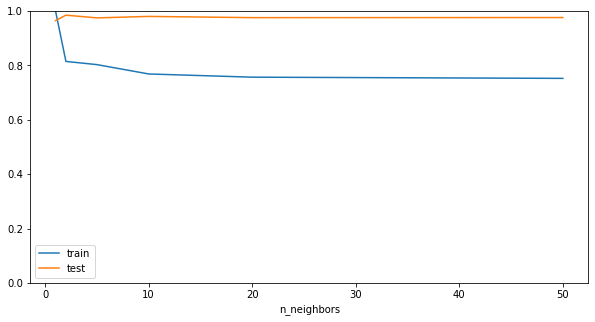

In [74]:
fig, ax = plt.subplots(1, 1, figsize = [10, 5])
ax.plot(nnb, accuracy_train, label = "train")
ax.plot(nnb, accuracy_test, label = "test")
ax.set_xlabel("n_neighbors")
ax.set_ylim([0, 1])
plt.legend()
plt.show()

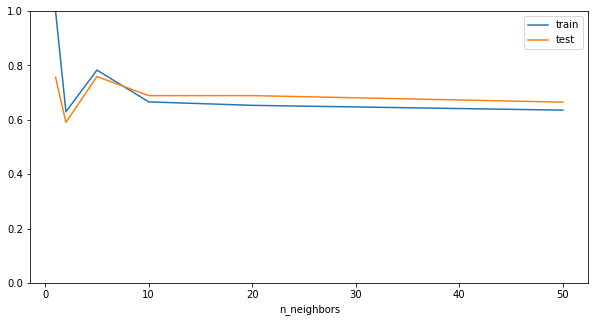

In [76]:
fig, ax = plt.subplots(1, 1, figsize = [10, 5])
ax.plot(nnb, precision_train, label = "train")
ax.plot(nnb, precision_test, label = "test")
ax.set_xlabel("n_neighbors")
ax.set_ylim([0, 1])
plt.legend()
plt.show()

Для задачи определения опасных астероидов основная метрика - точность. По графикам видно, что наилучшее значение достигается при n_neighbors = 5. Алгоритм kNN - простой, но допустимо сказать, что он с задачей справился. Алгоритм борьбы с несбалансированными классами путём ограничения преобладающего класса до недостающего, показал свою работоспособность.

In [78]:
print(f'test precision:', precision_test[2])
print(f'test accuracy:', accuracy_test[2])
print(f'train precision:', precision_train[2])
print(f'train accuracy:', accuracy_train[2])

test precision: 0.7592778335005015
test accuracy: 0.9750191917130668
train precision: 0.7829076620825147
train accuracy: 0.8030451866404715


 ## 9. Выводы

С помощью метода kNN можно предсказать, опасен ли метеорит с плохой точностью (около 78% на обучающей выборке и 75% на тестовой выборке).